In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import scikit-learn modules
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from scipy.io import arff

In [2]:

# Load the ARFF file
data, meta = arff.loadarff("C:\Sravan ML\ML_git\Decision Tree\Rice_Cammeo_Osmancik.arff")

# Convert the ARFF data to a pandas DataFrame
Rice_Cammeo_Osmancik = pd.DataFrame(data)

# Display the DataFrame
print(Rice_Cammeo_Osmancik.head())

      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent      Class  
0      15617.0  0.572896  b'Cammeo'  
1      15072.0  0.615436  b'Cammeo'  
2      14954.0  0.693259  b'Cammeo'  
3      13368.0  0.640669  b'Cammeo'  
4      15262.0  0.646024  b'Cammeo'  


In [3]:
Rice_Cammeo_Osmancik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Class' column
Rice_Cammeo_Osmancik['Class'] = label_encoder.fit_transform(Rice_Cammeo_Osmancik['Class'])

# Display the DataFrame
print(Rice_Cammeo_Osmancik.head())

Rice_Cammeo_Osmancik['Class'] = Rice_Cammeo_Osmancik['Class'].astype(float)



      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  Class  
0      15617.0  0.572896      0  
1      15072.0  0.615436      0  
2      14954.0  0.693259      0  
3      13368.0  0.640669      0  
4      15262.0  0.646024      0  


In [5]:
Rice_Cammeo_Osmancik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   float64
dtypes: float64(8)
memory usage: 238.3 KB


In [6]:
# Count the occurrences of each class
class_counts = Rice_Cammeo_Osmancik['Class'].value_counts()

# Display the counts
print("Counts of each class:")
print(class_counts)

Counts of each class:
Class
1.0    2180
0.0    1630
Name: count, dtype: int64


In [7]:
Rice_Cammeo_Osmancik.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [8]:
# Get the values from the DataFrame
area_values = Rice_Cammeo_Osmancik['Area'].values
perimeter_values = Rice_Cammeo_Osmancik['Perimeter'].values
major_axis_length_values = Rice_Cammeo_Osmancik['Major_Axis_Length'].values
minor_axis_length_values = Rice_Cammeo_Osmancik['Minor_Axis_Length'].values
eccentricity_values = Rice_Cammeo_Osmancik['Eccentricity'].values
convex_area_values = Rice_Cammeo_Osmancik['Convex_Area'].values
extent_values = Rice_Cammeo_Osmancik['Extent'].values
#Class_values = Rice_Cammeo_Osmancik['Class'].Values
# Create a new array with the values
new_array = np.column_stack((area_values, perimeter_values, major_axis_length_values,
                             minor_axis_length_values, eccentricity_values,
                             convex_area_values, extent_values))

# Convert the new array to float64
new_array_float64 = new_array.astype('float64')

# Now 'new_array_float64' should contain your data in the desired format


In [9]:
# Split the dataset into features (X) and the target variable (y)
x = new_array_float64
y = Rice_Cammeo_Osmancik['Class']

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
print ("Training Data Score:"+str(clf.score(x_train,y_train)))
print ("Testing Data Score:"+str(clf.score(x_test,y_test)))

Training Data Score:1.0
Testing Data Score:0.8766404199475065


In [13]:
# # Make predictions on the testing set
y_pred = clf.predict(x_test)

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8766404199475065


In [14]:
clf1=DecisionTreeClassifier(max_depth=8)
clf1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [15]:
print ("Training Data Score:"+str(clf1.score(x_train,y_train)))
print ("Testing Data Score:"+str(clf1.score(x_test,y_test)))

Training Data Score:0.9609580052493438
Testing Data Score:0.8910761154855643


In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3,4,5,7,8], 'max_leaf_nodes':[2,3,4,5,6]}
clf2 = DecisionTreeClassifier()
clf2=GridSearchCV(clf2,parameters)

In [17]:
clf2.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 7, 8],
                         'max_leaf_nodes': [2, 3, 4, 5, 6]})

In [18]:
print ("Training Data Score:"+str(clf2.score(x_train,y_train)))
print ("Testing Data Score:"+str(clf2.score(x_test,y_test)))

Training Data Score:0.9311023622047244
Testing Data Score:0.9146981627296588


In [19]:
clf2.best_params_

{'max_depth': 3, 'max_leaf_nodes': 2}

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = clf2.predict(x_test)
confusion_matrix(y_test,y_pred)   

array([[290,  18],
       [ 47, 407]], dtype=int64)

In [21]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(290, 18, 47, 407)

In [22]:
y_pred_total=clf2.predict(x)
tn,fp,fn,tp= confusion_matrix(y ,y_pred_total).ravel()
tn,fp,fn,tp


(1519, 111, 164, 2016)

In [23]:
# Count the occurrences of each class
class_counts = Rice_Cammeo_Osmancik['Class'].value_counts()

# Display the counts
print("Counts of each class:")
print(class_counts)     

Counts of each class:
Class
1.0    2180
0.0    1630
Name: count, dtype: int64


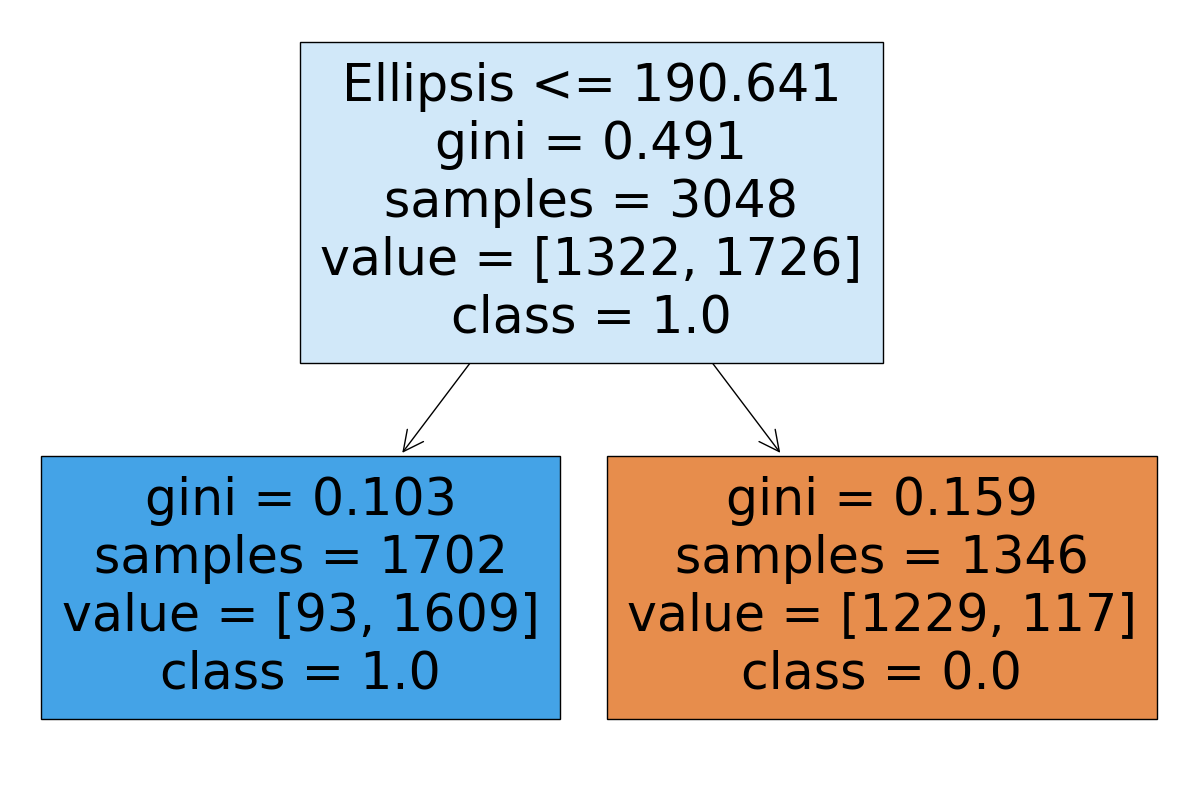

In [24]:
# Assuming clf2 is your GridSearchCV classifier and x_train is a DataFrame or numpy array

# Fit the GridSearchCV classifier
clf2.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf2.best_estimator_, filled=True, feature_names=["Feature1", "Feature2", ...], class_names=["0.0", "1.0"])
plt.show()
       